<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Machine_Learning/blob/main/ADP/Chapter_6_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 9. 나이브 베이즈 분류 (Naive Bayes)

## 1.개념

나이브베이즈는 데이터가 각 클래스에 속할 특징 확률을 계산하는 조건부 확률 기반의 분류 방법이다. 나이브베이즈 분류 기법이 예측한 특징을 상호독립적이라는 가정 하에 확률 계산을 단순화하고 모든 변수가 동등하다는 특징에서 비롯되었다. 베이즈는 베이지안 통계를 기반으로 입력 특징이 클래스 전체의 확률분포 대비 특정 클래스에 속할 확률을 정리하였다는 점에서 비롯되었다.

### (1)베이즈정리

1. 개념

베이즈 정리는 나이브베이즈 알고리즘의 기본이 되는 개념으로서, 두 확률 변수의 사전확률과 사후확률 사이의 관계를 나타내는 정리이다. 사건 A,B가 있을 때 사건 B가 일어난 것을 전제로 한 사건 A의 조건부 확률을 구하는 것이다. 하지만 현재 가지고 있는 정보는 사건 A가 일어난 것을 전젤 한 사건 B의 조건부 확률과 A, B의 확률 뿐이다. 이때, 원래 구하고자 했던 것을 다음과 같이 구할 수 있다는 것이 베이즈 정리이다.



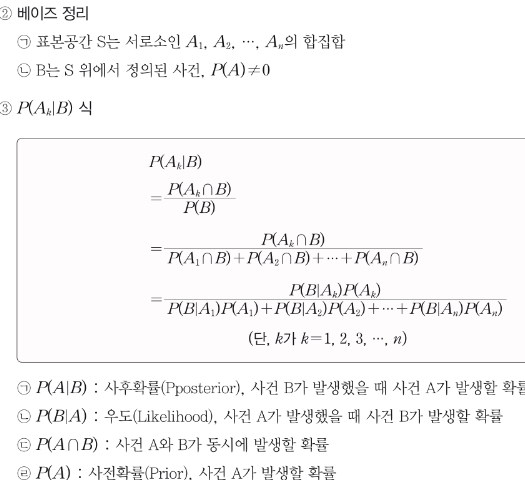

2. 베이즈 정리 예시
Q. 자동차 사고로 사망한 사람의 40%는 안전띠를 매지 않았다. 그렇다면 60%는 안전띠를 매고 죽었다는 의미인데 안전띠가 더 위험한 것인가?

위 예시를 통해 조건부확률의 함정을 발견할 수 있다. 해당 통계가 차사고로 사망한 사람 중에서 안전띠 맨 사람 비율이 60%라는 것이 '안전띠 맸을 때 차사고로 사망할 확률이 더 높다'는 식으로 오해하는 것이다. 두 조건부확률 P(A|B)와 P(B|A)가 서로 다르기 때문에 이러한 오류가 발생한다.

오류를 반박하려면 '전체 운전자 중 안전띠를 맨 사람의 비율'이 필요하다. 전체 운전자의 95%가 안전띠를 매고 5%는 안 맸다고 가정한다. 또한 전체 운전자 1만명 중 1명 꼴로 차사고로 사망한다고 가정한다. 운전자가 안전띠를 매는 사건을 A라 하고 운전자가 차사고로 사망하는 사건을 B라하면, P(A|B) = 0.6P(A|B) = 0.6임을 의미하는 것이다. 또한 두 개의 가정으로부터 P(A) = 0.95, P(B) = 0.000임을 알 수 있다.

안전띠를 맸을 때 차사고로 사망할 확률은 다음과 같다.

  P(B|A) = P(A⋂B)/P(A) = P(A|B)P(B)/P(A) = 0.6*0.0001/0.95 = 0.000063

안전띠를 매지 않았을 때 차사고로 사망할 확률은 다음과 같다.

P(B|Aᶜ) = P(Aᶜ⋂B)/P(Aᶜ) = P(Aᶜ|B)P(B)/P(Aᶜ) = 0.4*0.0001/0.05 = 0.0008




### (2)나이브베이즈 분류

1. 개념

나이브베이즈 분류는 하나의 속성값을 기준으로 다른 속성이 독립적이라 전제했을 때 해당 속성값이 클래스 분류에 미치는 영향을 측정한다. 속성값에 대해 다른 속성이 독립적이라는 가정은 클래스 조건 독립성이라 한다. n개의 특징에 대한 결합 조건부 분포는 특징들의 분포를 곱한 것으로 표현할 수 있다.

예를 들어 메일함으로 전송되는 전체 메일 중 10%가 스팸이고, 전체 중 4%가 복권이라는 단어를 갖고있다. 특정 메일이 스팸일 확률은 0.1이다. 또한 복권이란 단어가 들어간 메세지가 있을 확률은 0.04이다. 이때 복권과 스팸은 독립적이므로, 메일에 복권과 스팸이 모두 있을 확률은 P(스팸⋂복권) = P(스팸)*P(복권) = 0.1*0.04이다. 즉, 전체 메일 중 0.4%가 복권이라느 단어를 가진 스팸메일이다.


---


2. 나이브베이즈 분류 작동 원리

스팸메일 탐지 방법을 예시로 나이브베이즈 원리를 알아본다. 예를들어 메일에 복권과 같은 단어가 섞여있다면 스팸일 가능성이 더 높다고 알려져 있다. **나이브베이즈의 목표는 사후확률을 구하는 것이다. 즉, 메세지에 복권이라는 단어가 발견됐을 때 그 메세지가 스팸일 확률을 구하는 것이다.**

샘플데이터가 스팸에 속하는 사건의 확률은 관측값의 특징에 대한 지식이 없이 클래스가 어떻게 분포되어있는지 사전확률로 나타낸다. 사전확률은 사전에 결정되었거나, 학습 샘플데이터를 이용해 학습시킬 수 있다. 사전확률은 '전체 메일에서 스팸이 차지하는 비율'이고, 이는 이미 알고있는 정보이다. 학습 샘플데이터를 통해 복권이라는 단어가 포함된 메일의 비율도 알 수 있다. 이를 주변우도라고 한다. P(스팸)과 P(복권)이 독립이라는 가정하에 우도를 구할 수 있다. 세 가지 단서에 베이즈 정리를 적용하면 메세지에서 복권이라는 단어가 발견됐을 때 그 메세지가 스팸일 확률을 알 수 있다. 이때 사후확률이 50% 이상이면 스팸일 가능성이 더 높다는 의미이다.


---


3. 라플라스 스무딩

라플라스 스무딩은 나이브베이즈 분류를 보정하는 기법이다. 특징의 출현 횟수의 초기값을 보정한다. 발견되지 않은 특징의 출현빈도 초기값을 1로 설정하고 초기값을 1부터 시작하는 것이다. 이는 특히 다중분류모델에서 특징이 없는 값으로 인해 0을 곱해 발생하는 문제를 극복하게 한다.

예를 들어, 나이브베이즈 분류로 스팸메일 필터를 가동한다고 한다. 학습데이터에 없던 단어가 실제 상황에서 나타나면 확률이 0이 되어 스팸 분류가 어려워진다. 스무딩은 학습데이터에 없던 데이터가 등장해도 빈도수에 1을 더해 0이 되는 현상을 막는다.


---


4. 나이브베이즈 분류의 장단점
- 장점
  - 간단하고 빠르다
  - 노이즈와 결측치에 강하다
  - 예측을 위한 추정확률을 쉽게 얻을 수 있다

- 단점
  - 모든 특징이 동등하게 중요하며 독립이라고 가정하기 때문에, 가정이 잘못된 경우가 종종 있다
  - 가정된 확률이 예측된 클래스보다 덜 신뢰할 만하다.


---


5. 나이브베이즈 분류를 선택할 수 있는 경우

데이터가 많다면 전통적 추정법을 사용하지만, 아래 두 경우는 나이브를 추천한다.
- 데이터가 많지 않을 때:

  과거의 빈도를 보여주는 데이터가 많지 않거나, 자주 일어나지 않는 사건이어서 빈도주의적 추론의 사용이 마땅치 않을 때 나이브베이즈를 추천한다. 이때는 빈도가 적기 때무넹 전통적 추정의 신뢰도가 크게 떨어지기 때문이다.

- 추정의 목적이 미래 예측일 때:

  베이지안 접근은 하나의 추정치를 고집하는 것이 아니라 계속해서 값을 수정하면서 좀더 현실적인 추정치를 찾아나가는 기법이다. 따라서 예측 목적에 잘 맞는다.


---


6. scikit-learn의 나이브베이즈 분류기

- BernoulliNB

  - 데이터 출현 여부에 따라 1or0 이진데이터로 분류되는 경우.
  - ex) 주사위 4번 던져 1이 1번, 3이 2번, 4가 1번 나왔다. 1부터 6까지 숫자가 등장했을 때는 1, 그렇지 않으면 0으로 하여 주사위 던진 결과를 [1,0,1,1,0,0]으로 표현할 수 있다.
  - ex) 스팸메일 분류

- MultinomialNB

  - 데이터의 출현 횟수에 따라 값을 달리한 데이터에 사용
  - ex) 주사위 4번 던져 1이 1번, 3이 2번, 4가 1번 나왔다. 1부터 6까지 숫자의 등장횟수로 주사위를 던진 결과를 나타내면 [1,0,2,1,0,0]으로 나타낼 수 있다
  - ex) 영화 감상평 토대로 긍정/부정 리뷰 분류

- GaussianNB

  - 연속적인 성질이 있는 특징이 있는 데이터를 분류하는 데 사용
  - 특징들의 값이 정규분포라는 가정 하에 조건부 확률 계산

## 2.scikit-learn의 GaussianNB

캐글 Sloan Digital Sky Survey DR14 데이터셋 사용

우주의 관측 결과에 따라 물체가 은하인지 별인지 분류

In [1]:
import pandas as pd
sky = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Skyserver.csv")
sky.head(3)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513


In [2]:
sky['class'].unique() # 클래스 변수 확인. 타깃으로 설정

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

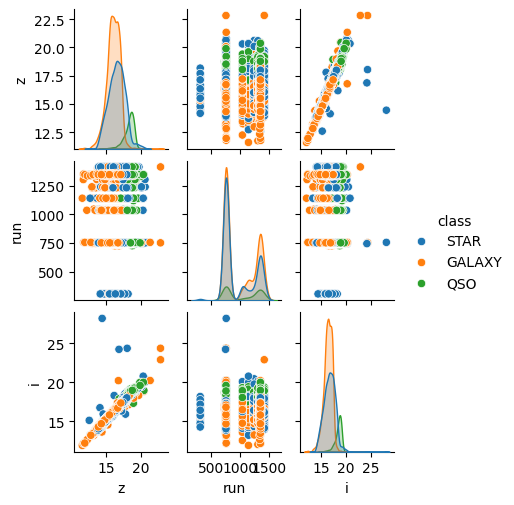

In [9]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
# FutureWarning 경고 메시지 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.pairplot(hue = 'class', data = sky[['z', 'run', 'i', 'class']], height=1.7, aspect=0.8)

In [10]:
import numpy as np
features = list(sky.columns)
features.remove('class')
X = sky[features] # 설명변수 지정
y = sky['class'] # 타깃변수 지정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


- 하이퍼파라미터

alpha: 디폴트 1. 스무딩 매개변수. 스무딩 없는 경우 0 입력

fit_prior: 디폴트 True. 클래스의 사전확률을 학습하는지 여부 결정. False면 균일한 사전확률 적용.

class_prior: 디폴트 None. 클래스의 사전확률

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(x_train, y_train).predict(x_test)
print(f'정확도: {gnb.score(x_test, y_test): .3f}')

정확도:  0.797


In [13]:
gnb.predict_proba(x_test)[[0, 13, 68]] # 0, 13, 68에 해당하는 데이터의 추정확률 확인

array([[8.24831606e-01, 4.93802630e-02, 1.25788131e-01],
       [2.23298306e-03, 1.06346837e-01, 8.91420180e-01],
       [4.98781827e-05, 8.49410539e-02, 9.15009068e-01]])

In [14]:
gnb.predict(x_test)[[0, 13, 68]] # 0, 13, 68에 해당하는 데이터의 예측값 확인

array(['GALAXY', 'STAR', 'STAR'], dtype='<U6')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred)) # 예측성능 확인

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.82      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.57      0.55      3000
weighted avg       0.75      0.80      0.76      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3.scikit-learn의 BernoulliNB

UCI Machine Learning 저장소의 SMS 스팸메세지 데이터 통해 스팸메일 분류

In [20]:
spam = pd.read_csv("http://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv", encoding = 'utf-8')
spam.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [23]:
print(spam.isna().sum()) # 인덱스 2~4 컬럼은 결측치가 50% 이상

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [24]:
# 인덱스 2~4 컬럼 제거
spam = spam[['v1', 'v2']]

In [25]:
# v1은 해당 메일이 스팸인지 아닌지 여부에 대한 변수임. 어떤 값 존재하는지 확인.
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [26]:
spam['label'] = np.where(spam['v1'] == 'spam', 1, 0) # spam이면 1 아니면 0
spam.head(3)

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


In [27]:
X = spam['v2'] # 설명변수
y = spam['label'] # 타깃변수

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 56)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


### + CountVectorizer

- 텍스트 데이터를 단어의 등장 횟수를 기준으로 벡터화.
- 각 문서를 단어의 빈도수로 표현하는 희소 행렬(sparse matrix)을 생성.
- 불용어(stop words) 제거, n-gram(단어 묶음) 생성, 최소/최대 빈도수 기준으로 단어 필터링 등의 옵션 제공.

In [29]:
# 샘플 텍스트 데이터
texts = ["I love programming", "I love Python", "Python is great for programming"]
vectorizer = CountVectorizer() # CountVectorizer 객체 생성
X = vectorizer.fit_transform(texts) # 텍스트 데이터를 벡터화
print(X.toarray()) # 벡터화된 결과 출력 (단어 빈도 행렬). 각 문장의 단어 빈도를 나타내는 2D 배열.
print(vectorizer.get_feature_names_out()) # 각 단어에 해당하는 인덱스. get_feature_names_out()은 변환된 벡터의 각 열이 어떤 단어에 해당하는지 보여줌.

[[0 0 0 1 1 0]
 [0 0 0 1 0 1]
 [1 1 1 0 1 1]]
['for' 'great' 'is' 'love' 'programming' 'python']


In [30]:
# 여러 문서 텍스트 데이터에서 특정 단어 빈도수 세는 법
texts = [
    "This is a spam email. Please ignore this spam message.",
    "Here is another message without spam.",
    "Spam messages are annoying."
]
vectorizer = CountVectorizer(vocabulary=["spam"]) # 'spam' 단어만을 벡터화하기 위해 단어를 제한
X = vectorizer.fit_transform(texts) # 텍스트 데이터를 벡터화
spam_count = X.toarray().sum()
print(f"'spam' 단어가 총 {spam_count}번 등장했습니다.") # 'spam'이 문서들에서 각각 몇 번 등장했는지 출력

'spam' 단어가 총 4번 등장했습니다.


In [31]:
# ++ 기본 count 함수 활용하기
# 텍스트 데이터
text_data = "This is a spam email. Please ignore this spam message."
# 'spam'이 몇 번 등장하는지 카운트
spam_count = text_data.lower().count("spam")
print(f"'spam' 단어가 {spam_count}번 등장했습니다.")

'spam' 단어가 2번 등장했습니다.


베르누이 나이브 베이즈 분류기는 이산형 데이터만 입력 데이터로 취급하므로, 이산형으로 전처리 해야함. 따라서 CountVectorizer 사용해서 입력된 데이터에 출현된 모든 단어의 개수만큼의 크기를 가진 벡터 만들어 이메일을 고정된 벡터로 표현할 것임. binary = True로 설정하여 이메일마다 단어가 한 번 이상 등장하면 1, 그렇지 않으면 0이 되도록 함.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(3900, 7236)

In [37]:
encoded_input = x_traincv.toarray()
encoded_input # x_traincv 벡터화 확인

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
print(cv.inverse_transform(encoded_input[[0]])) # 벡터로 인코딩된 이메일에 어떤 단어가 포함되었는지 확인
print(cv.get_feature_names_out()[1000:1010], end = '') # 벡터의 인덱스가 각각 어떤 단어를 뜻하는지  확인

[array(['30', 'age', 'fine', 'for', 'ice', 'is', 'or', 'then', 'yep'],
      dtype='<U34')]
['atural' 'auction' 'audiitions' 'audition' 'audrey' 'audrie' 'august'
 'aunt' 'auntie' 'aunties']

In [43]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train) # model fitting

x_testcv = cv.transform(x_test) # 베르누이 나이브베이즈 분류 모델의 입력 데이터로 변환
pred = bnb.predict(x_testcv) # predict

from sklearn.metrics import accuracy_score
print(f'ACC: {accuracy_score(y_test, pred): .3f}')
print(classification_report(y_test, pred))

ACC:  0.972
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1448
           1       0.99      0.80      0.89       224

    accuracy                           0.97      1672
   macro avg       0.98      0.90      0.94      1672
weighted avg       0.97      0.97      0.97      1672



## 4.scikit-learn의 MultinomialNB

IMDB 영화 리뷰 데이터 통해 영화에 대한 긍부정 평가 분류

keras의 imdb데이터는 감성분석을 위해 텍스트가 숫자로 변환된 데이터임. 따라서 ML을 위해 숫자를 텍스트로 재변환 해야함

In [44]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [45]:
print(X_train.shape, X_test.shape)

(25000,) (25000,)


텍스트 데이터로 변환하기

인덱스와 토큰으로 단어를 짝지어 문장 완성해 DF에 담음. (ADP 시험에선 데이터가 주어져서 이런 전처리는 필요없긴함..)

In [48]:
word_to_index = imdb.get_word_index()
index_to_word = {}

for key, value in word_to_index.items() :
    index_to_word[value + 3] = key
for index, token in enumerate(("<pad>", "<sos>", "<unk>")) :
    index_to_word[index] = token

train_reviews = []
for X in X_train:
    tmp = ' '.join([index_to_word[index] for index in X])
    train_reviews.append(tmp)

test_reviews = []
for X in X_test:
    tmp = ' '.join([index_to_word[index] for index in X])
    test_reviews.append(tmp)

train = pd.concat([pd.DataFrame(train_reviews), pd.DataFrame(y_train)], axis = 1)
train.columns = ['reviews', 'label']
train['reviews'] = train['reviews'].str[6:]

test = pd.concat([pd.DataFrame(test_reviews), pd.DataFrame(y_test)], axis = 1)
test.columns = ['reviews', 'label']
test['reviews'] = test['reviews'].str[6:]

print("<<<<<< Train Dataset for MNB >>>>>>", train.head(3))
print("<<<<<< Test Dataset for MNB >>>>>>", test.head(3))

<<<<<< Train Dataset for MNB >>>>>>                                              reviews  label
0  this film was just brilliant casting location ...      1
1  big hair big boobs bad music and a giant safet...      0
2  this has to be one of the worst films of the 1...      0
<<<<<< Test Dataset for MNB >>>>>>                                              reviews  label
0  please give this one a miss br br kristy swans...      0
1  this film requires a lot of patience because i...      1
2  many animation buffs consider wladyslaw starew...      1


In [49]:
x_train, x_test = train['reviews'].values, test['reviews'].values
y_train, y_test = train['label'].values, test['label'].values
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


멀티노미얼 나이브베이즈는 이산형만 입력데이터로 취하는 기법임. 그러므로 데이터를 1과 0으로 전처리 해야함.

CountVectorizer 사용해서 입력된 데이터에 출현된 모든 단어의 개수만큼의 크기를 가진 벡터를 만들어 이메일을 고정된 벡터로 표현함. binary = False로 설정하여 이메일마다 단어가 한 번 이상 등장하면 개수를 세도록 함.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary = False)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(25000, 74703)

In [51]:
print(cv.inverse_transform(x_traincv)[0 ]) # 벡터로 인코딩된 이메일 제목에 어떤 단어가 있는지 확인

['this' 'film' 'was' 'just' 'brilliant' 'casting' 'location' 'scenery'
 'story' 'direction' 'everyone' 'really' 'suited' 'the' 'part' 'they'
 'played' 'and' 'you' 'could' 'imagine' 'being' 'there' 'robert' 'redford'
 'is' 'an' 'amazing' 'actor' 'now' 'same' 'director' 'norman' 'father'
 'came' 'from' 'scottish' 'island' 'as' 'myself' 'so' 'loved' 'fact'
 'real' 'connection' 'with' 'witty' 'remarks' 'throughout' 'were' 'great'
 'it' 'much' 'that' 'bought' 'soon' 'released' 'for' 'retail' 'would'
 'recommend' 'to' 'watch' 'fly' 'fishing' 'cried' 'at' 'end' 'sad' 'know'
 'what' 'say' 'if' 'cry' 'must' 'have' 'been' 'good' 'definitely' 'also'
 'congratulations' 'two' 'little' 'boy' 'of' 'paul' 'children' 'are'
 'often' 'left' 'out' 'praising' 'list' 'think' 'because' 'stars' 'play'
 'them' 'all' 'grown' 'up' 'such' 'big' 'profile' 'whole' 'but' 'these'
 'should' 'be' 'praised' 'done' 'don' 'lovely' 'true' 'someone' 'life'
 'after' 'shared' 'us']


In [52]:
print(cv.get_feature_names_out()[-10:]) # 벡터의 인덱스가 각각 어떤 단어를 뜻하는지  확인

['était' 'état' 'étc' 'évery' 'êxtase' 'ís' 'ísnt' 'østbye' 'über'
 'üvegtigris']


In [54]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)

print(f'ACC: {accuracy_score(y_test, pred): .3f}')
print(classification_report(y_test, pred))

ACC:  0.814
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     12500
           1       0.86      0.75      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000

